# Week 3 - Collecting X (Formerly Twitter) Data for Predictive Tasks 

## 1. Twitter Data Collection 
### X (formerly Twitter) APIs
The Twitter API enables programmatic access to Twitter in unique and advanced ways. It used to be free, but now charges a fee of $100 per month. We have a class API that we collectively use. It is based on Twitter API V2. Please only use it for class projects and assignments.

[Twitter API Document](https://developer.twitter.com/en/docs/twitter-api)

#### 1.1. Retrieve User ID from Username
The corresponding document is [here](https://developer.twitter.com/en/docs/twitter-api/users/lookup/api-reference/get-users-by-username-username).

In [2]:
import requests
import os
import json
import pandas as pd

# To set your enviornment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'
bearer_token =''

def create_url():
    # Specify the usernames that you want to lookup below
    # You can enter up to 100 comma-separated values.
    usernames = "usernames=Grammarly,copy_ai"
    user_fields = "user.fields=description,created_at,verified,public_metrics,id"
    url = "https://api.twitter.com/2/users/by?{}&{}".format(usernames, user_fields)
    #Uses curly braces {} as placeholders for the values provided through format().
    return url


def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2UserLookupPython"
    return r


def connect_to_endpoint(url):
    response = requests.request("GET", url, auth=bearer_oauth,)
    print(response.status_code)
    return response.json()



    #print(json.dumps(json_response, indent=4, sort_keys=True))

In [85]:
url = create_url()
json_response = connect_to_endpoint(url)
print(json.dumps(json_response, indent=4, sort_keys=True))

200
{
    "data": [
        {
            "created_at": "2009-06-14T22:23:52.000Z",
            "description": "Good writing moves work forward. #StandWithUkraine",
            "id": "47191725",
            "name": "Grammarly",
            "public_metrics": {
                "followers_count": 234869,
                "following_count": 3635,
                "like_count": 21655,
                "listed_count": 3006,
                "tweet_count": 41042
            },
            "username": "Grammarly",
            "verified": true
        },
        {
            "created_at": "2020-09-01T18:22:46.000Z",
            "description": "Over 10 million people use our ai copywriting tools to help them write social media posts, website content, and blog posts in seconds.",
            "id": "1300861660744372230",
            "name": "copy.ai",
            "public_metrics": {
                "followers_count": 55968,
                "following_count": 253,
                "like_count": 1082,
 

### 1.2 Collect Tweets with the User IDs 

The API documents for this step is [here](https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/api-reference/get-tweets-id).

In [3]:
import requests
import os
import json
import pandas as pd

######################
####Authentication####
######################
bearer_token =''

def create_url():
    # Replace with user ID below
    user_id = 47191725
    return "https://api.twitter.com/2/users/{}/tweets".format(user_id)


def get_params():
    return {"tweet.fields": "created_at,public_metrics"}


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2UserTweetsPython"
    return r


def connect_to_endpoint(url, params):
    response = requests.request("GET", url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()





In [ ]:

url = create_url()
params = get_params()
json_response = connect_to_endpoint(url, params)
    # Extract "data" key from JSON
data = json_response['data']
    # Normalize the data and create a dataframe
df = pd.json_normalize(data)
    # Save the DataFrame to a CSV file
filename = 'tweets.csv'  # Specify the path and filename
    # use function to_csv to save a dataframe to a csv file.
df.to_csv(filename, index=False)  

## 2.Natural Language Processing

### 2.1 Term Frequency(TF) — Inverse Dense Frequency(IDF) Vectorization

### An Example

In [4]:
Document1= "It is going to rain today."
Document2= "Today I am not going outside."
Document3= "I am going to watch the season premiere."
Doc = [Document1 ,
 Document2 , 
 Document3]
print(Doc)

['It is going to rain today.', 'Today I am not going outside.', 'I am going to watch the season premiere.']


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() #TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
analyze = vectorizer.build_analyzer()
print("Document 1",analyze(Document1))
print("Document 2",analyze(Document2))
print("Document 3",analyze(Document3))

X = vectorizer.fit_transform(Doc)

df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df

Document 1 ['it', 'is', 'going', 'to', 'rain', 'today']
Document 2 ['today', 'am', 'not', 'going', 'outside']
Document 3 ['am', 'going', 'to', 'watch', 'the', 'season', 'premiere']


C:\Users\Xue Tan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,am,going,is,it,not,outside,premiere,rain,season,the,to,today,watch
0,0.000000,0.278245,0.47111,0.47111,0.000000,0.000000,0.000000,0.47111,0.000000,0.000000,0.358291,0.358291,0.000000
1,0.406192,0.315444,0.00000,0.00000,0.534093,0.534093,0.000000,0.00000,0.000000,0.000000,0.000000,0.406192,0.000000
2,0.324124,0.251711,0.00000,0.00000,0.000000,0.000000,0.426184,0.00000,0.426184,0.426184,0.324124,0.000000,0.426184


In [6]:
# TF-IDF Vectorization
df=pd.read_csv("grammarly_tweets.csv")
docs=df['text']
#Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(docs)


tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df


,2024,_opelo,access,ai,amazing,awesome,best,buddyxo,business,calendly,...,want,way,webinar,words,work,workplace,wow,writing,yay,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.590691,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.504024,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


## 2.2 Non-negative Matrix Factorization (NMF)

In [7]:
# Apply NMF
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=7, random_state=0)
nmf_model.fit(tfidf)
W = nmf_model.fit_transform(tfidf)  # Document-topic matrix

# Display topics
feature_names = tfidf_vectorizer.get_feature_names_out()
topic_names=[]
for topic_idx, topic in enumerate(nmf_model.components_):
    print("Topic #{}:".format(topic_idx))
    print(" ".join([feature_names[i] for i in topic.argsort()[:-4 - 1:-1]]))
    topic_names.append(" ".join([feature_names[i] for i in topic.argsort()[:-4 - 1:-1]]))

Topic #0:
thanks sharing shout writing
Topic #1:
https grammarly ai time
Topic #2:
work great glad writing
Topic #3:
great job wow know
Topic #4:
thank sandyhubbard writing words
Topic #5:
like hear feedback users
Topic #6:
love hear sharing grammarly


C:\Users\Xue Tan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\Xue Tan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [83]:
topic_df = pd.DataFrame(W, columns=topic_names)
topic_df


,thanks sharing shout writing,https grammarly ai time,work great glad writing,great job wow know,thank sandyhubbard writing words,like hear feedback users,love hear sharing grammarly
0,0.000000,0.000000,0.461301,0.000000,0.053703,0.000000,0.000000
1,0.000000,0.048544,0.041799,0.000000,0.000000,0.000000,0.000000
2,0.233686,0.000000,0.000000,0.000000,0.008963,0.080404,0.425282
3,0.000000,0.045369,0.000000,0.000000,0.004087,0.000000,0.000000
4,0.000000,0.241056,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
105,0.373781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
106,0.000000,0.000000,0.000000,0.736827,0.000000,0.000000,0.000000
107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
108,0.000000,0.000000,0.000000,0.034927,0.060743,0.000000,0.057855


## 3.Predictive Analytics

### 3.1 Outcome

In [80]:
import numpy as np
df['log_view']=np.log1p(df['public_metrics.impression_count'])  
# Create a new column 'LogPlusOne' which is the log(value + 1) of the 'Value' column

### 3.2 Data Partition

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Assuming `y` is your target variable array
X_train, X_test, y_train, y_test = train_test_split(W, df['public_metrics.like_count'], test_size=0.2, random_state=0)


### 3.3 Train Model

In [72]:
# Initialize the RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 3.4 Prediction

In [73]:
# Make predictions and evaluate the model
predictions = regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 27.396096172597883
Root Mean Squared Error: 5.234128024093209


In [74]:
# Baseline - Linear Regression
import statsmodels.api as sm

linear_regression = sm.OLS(y_train, X_train)
linear_regression = linear_regression.fit()
predictions = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 35.07599966304653
Root Mean Squared Error: 5.922499443904282


### 3.5 Feature Importance

great job wow know                  0.011571
thanks sharing shout writing        0.014024
love hear sharing grammarly         0.041196
like hear feedback users            0.083717
work great glad writing             0.164651
thank sandyhubbard writing words    0.249057
https grammarly ai time             0.435784
dtype: float64

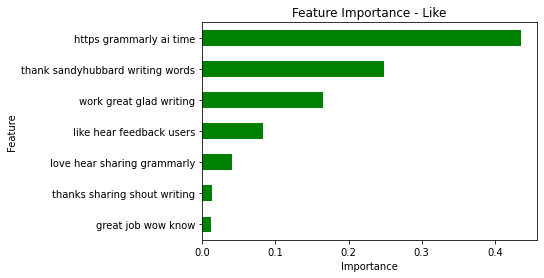

In [75]:
from matplotlib import pyplot as plt
#feature_names = [f"feature {i}" for i in range(W.shape[1])]
global_importances = pd.Series(regressor.feature_importances_, index=topic_names)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Like")
global_importances